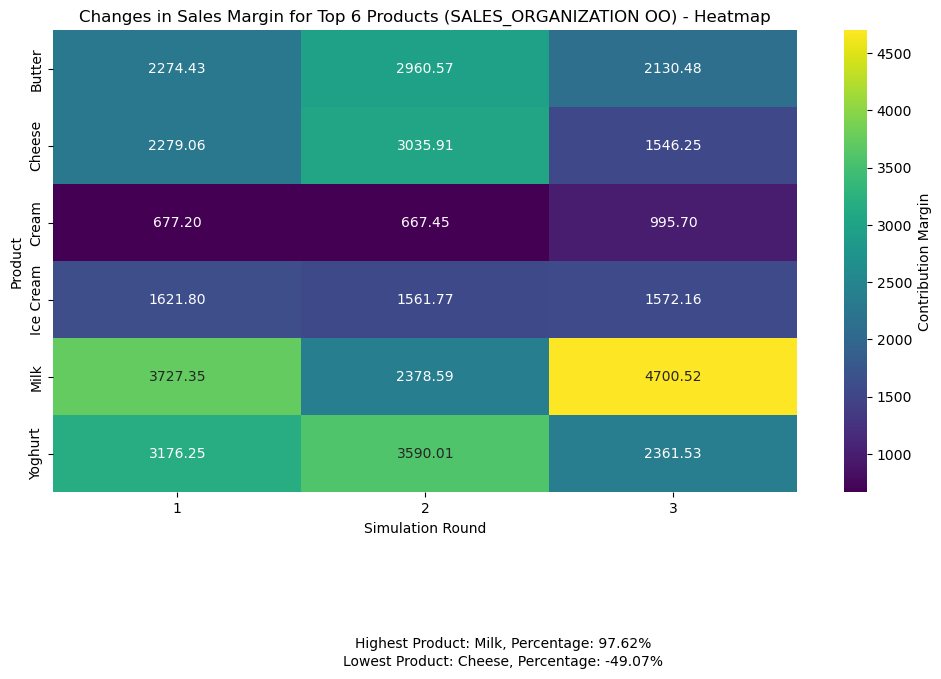

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = "https://github.com/MitaliP001/game/raw/main/sfinal_csv.csv"
df = pd.read_csv(file_path)

# Filter the data for SALES_ORGANIZATION 'OO'
filtered_df_oo = df[df['SALES_ORGANIZATION'] == 'OO']

# Get the top 6 products by quantity
top_products = filtered_df_oo.groupby('MATERIAL_DESCRIPTION')['QUANTITY'].sum().nlargest(6).index

# Filter the data for the top 6 products
filtered_df_top_products = filtered_df_oo[filtered_df_oo['MATERIAL_DESCRIPTION'].isin(top_products)]

# Pivot the data to get separate columns for each product
pivot_df = filtered_df_top_products.pivot_table(values='CONTRIBUTION_MARGIN', index='SIM_ROUND', columns='MATERIAL_DESCRIPTION', aggfunc='sum')

# Calculate percentage change for each product
percentage_change_df = pivot_df.pct_change() * 100

# Exclude the first row with NaN values
percentage_change_df = percentage_change_df.iloc[1:]

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df.T, cmap="viridis", annot=True, fmt=".2f", cbar_kws={'label': 'Contribution Margin'})
plt.xlabel('Simulation Round')
plt.ylabel('Product')
plt.title('Changes in Sales Margin for Top 6 Products (SALES_ORGANIZATION OO) - Heatmap')

# Add percentages of highest and lowest product
highest_product = percentage_change_df.max().idxmax()
highest_percentage = percentage_change_df[highest_product].max()
lowest_product = percentage_change_df.min().idxmin()
lowest_percentage = percentage_change_df[lowest_product].min()

plt.text(0.5, -0.15, f'Highest Product: {highest_product}, Percentage: {highest_percentage:.2f}%', transform=plt.gcf().transFigure, ha='center', color='black')
plt.text(0.5, -0.18, f'Lowest Product: {lowest_product}, Percentage: {lowest_percentage:.2f}%', transform=plt.gcf().transFigure, ha='center', color='black')

plt.show()
